In [ ]:

import pandas as pd
df=pd.read_csv('/content/myCarTrainDataset_2024 (1).csv')
df.head()


,price,doors,persons,boot,accept
0,high,4,2,med,no
1,low,4,4,big,no
2,high,3,5,big,no
3,high,4,2,med,no
4,low,3,5,big,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    500 non-null    object
 1   doors    500 non-null    int64 
 2   persons  500 non-null    int64 
 3   boot     500 non-null    object
 4   accept   500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [ ]:
df.describe()


,doors,persons
count,500.00000,500.000000
mean,3.73000,3.660000
std,0.83336,1.245593
min,3.00000,2.000000
25%,3.00000,2.000000
50%,3.00000,4.000000
75%,4.00000,5.000000
max,5.00000,5.000000


In [ ]:
df.describe(include='object')

,price,boot,accept
count,500,500,500
unique,2,2,2
top,high,med,no
freq,254,352,356


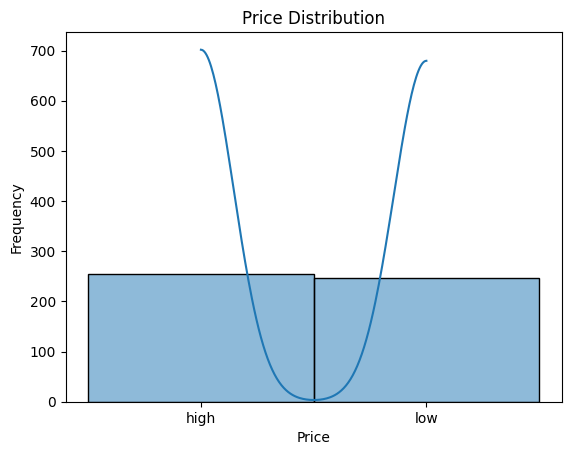

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['price'],kde=True,bins=20)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()





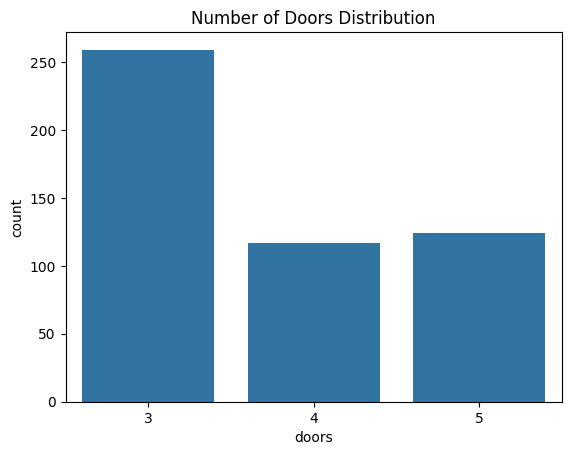

In [ ]:

sns.countplot(data=df,x='doors')
plt.title('Number of Doors Distribution')
plt.show()


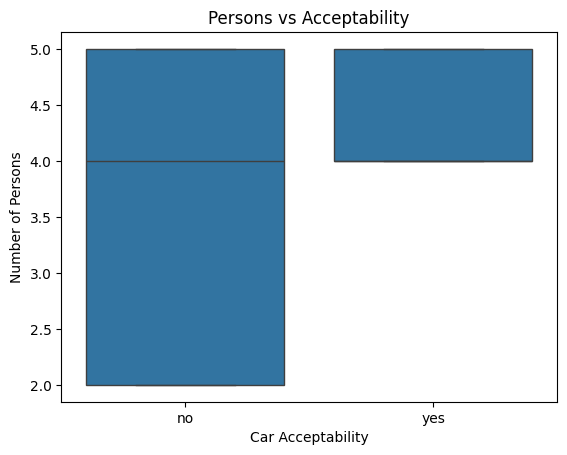

In [ ]:
sns.boxplot(x='accept', y='persons', data=df)
plt.title('Persons vs Acceptability')
plt.xlabel('Car Acceptability')
plt.ylabel('Number of Persons')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_data = df.copy()
label_encoder = LabelEncoder()

for column in ['price', 'boot', 'accept']:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

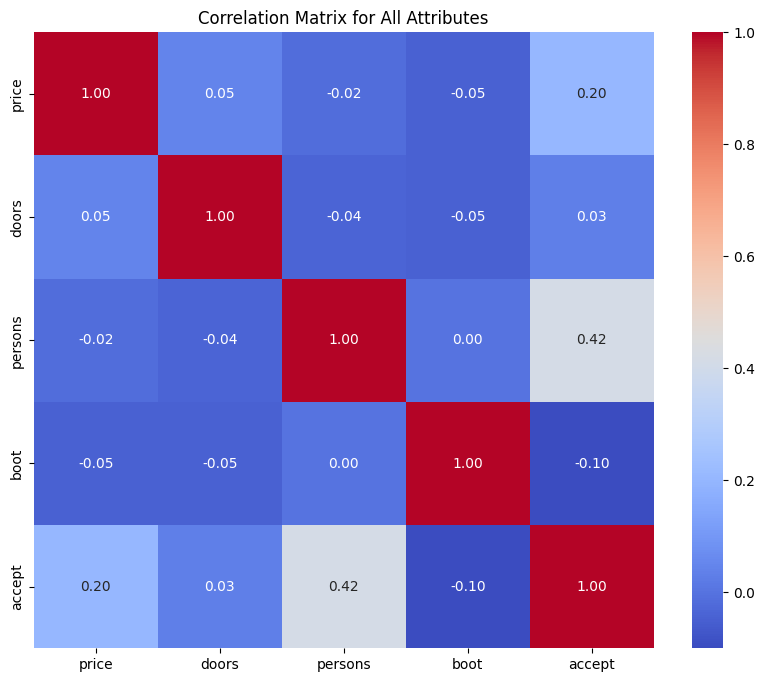

In [ ]:
# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for All Attributes')
plt.show()

# 2

In [ ]:
X = df[['price', 'doors', 'persons', 'boot']]
y = df['accept']
X.head()

,price,doors,persons,boot
0,high,4,2,med
1,low,4,4,big
2,high,3,5,big
3,high,4,2,med
4,low,3,5,big


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Verify the encoded dataset
print(df.head())


   price  doors  persons  boot  accept
0      0      4        2     1       0
1      1      4        4     0       0
2      0      3        5     0       0
3      0      4        2     1       0
4      1      3        5     0       0


In [ ]:
# Function to calculate Gini Impurity for a single group
def gini_impurity(group, target_classes):
    size = len(group)
    if size == 0:  # No data in the group
        return 0
    score = 0.0
    for class_val in target_classes:
        proportion = group.count(class_val) / size
        score += proportion ** 2
    return 1 - score

# Function to calculate weighted Gini Impurity for a split
def calculate_weighted_gini(groups, target_classes):
    total_size = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        gini += (size / total_size) * gini_impurity(group, target_classes)
    return gini


In [ ]:
# Function to split dataset based on a feature
def split_by_feature(feature, dataset, target_column):
    splits = {}
    for value in dataset[feature].unique():
        splits[value] = dataset[dataset[feature] == value]
    groups = [split[target_column].tolist() for split in splits.values()]
    return groups

# Function to evaluate Gini Impurity for a feature
def evaluate_feature_gini(feature, dataset, target_column):
    groups = split_by_feature(feature, dataset, target_column)
    target_classes = dataset[target_column].unique()
    weighted_gini = calculate_weighted_gini(groups, target_classes)
    return weighted_gini

# Evaluate Gini Impurity for all features
target_column = "accept"  # Define the target column
features = [col for col in df.columns if col != target_column]  # Exclude target column

print("Gini Impurities for Features:")
gini_results = {feature: evaluate_feature_gini(feature, df, target_column) for feature in features}
print(gini_results)


Gini Impurities for Features:
{'price': 0.392955124511875, 'doors': 0.40923123761833446, 'persons': 0.3265094530235243, 'boot': 0.4059788083538083}


In [ ]:
# Select the best feature based on Gini impurity
best_feature = min(gini_results, key=gini_results.get)
print(f"Best feature for splitting: {best_feature}")


Best feature for splitting: persons


In [ ]:
# Recursive function to build the decision tree
def build_tree(dataset, target_column, features):
    target_classes = dataset[target_column].unique()

    # If the dataset is pure, return the class
    if len(target_classes) == 1:
        return target_classes[0]

    # If no features are left, return the majority class
    if len(features) == 0:
        return dataset[target_column].mode()[0]

    # Find the best feature for splitting
    gini_results = {feature: evaluate_feature_gini(feature, dataset, target_column) for feature in features}
    best_feature = min(gini_results, key=gini_results.get)

    # Create tree node
    tree = {best_feature: {}}

    # Split dataset and build subtrees
    remaining_features = [f for f in features if f != best_feature]
    for value in dataset[best_feature].unique():
        subset = dataset[dataset[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, target_column, remaining_features)

    return tree

# Build the tree
decision_tree = build_tree(df, target_column, features)
print("Decision Tree:")
print(decision_tree)


Decision Tree:
{'persons': {2: 0, 4: {'price': {1: {'boot': {0: {'doors': {4: 1, 5: 0, 3: 1}}, 1: {'doors': {5: 1, 4: 1, 3: 1}}}}, 0: {'boot': {1: {'doors': {4: 0, 3: 0, 5: 0}}, 0: {'doors': {3: 0, 5: 1, 4: 0}}}}}}, 5: {'price': {0: {'boot': {0: {'doors': {3: 1, 5: 0, 4: 0}}, 1: {'doors': {3: 0, 4: 0, 5: 0}}}}, 1: {'boot': {0: {'doors': {3: 1, 4: 1, 5: 1}}, 1: {'doors': {3: 0, 4: 0, 5: 1}}}}}}}}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# Apply label encoding to all categorical columns in X
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Verify that the dataset is now numerical
print(X.head())


   price  doors  persons  boot
0      0      4        2     1
1      1      4        4     0
2      0      3        5     0
3      0      4        2     1
4      1      3        5     0


<ipython-input-16-d1bc1ef71064>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-16-d1bc1ef71064>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])



Building Tree with Depth = 1


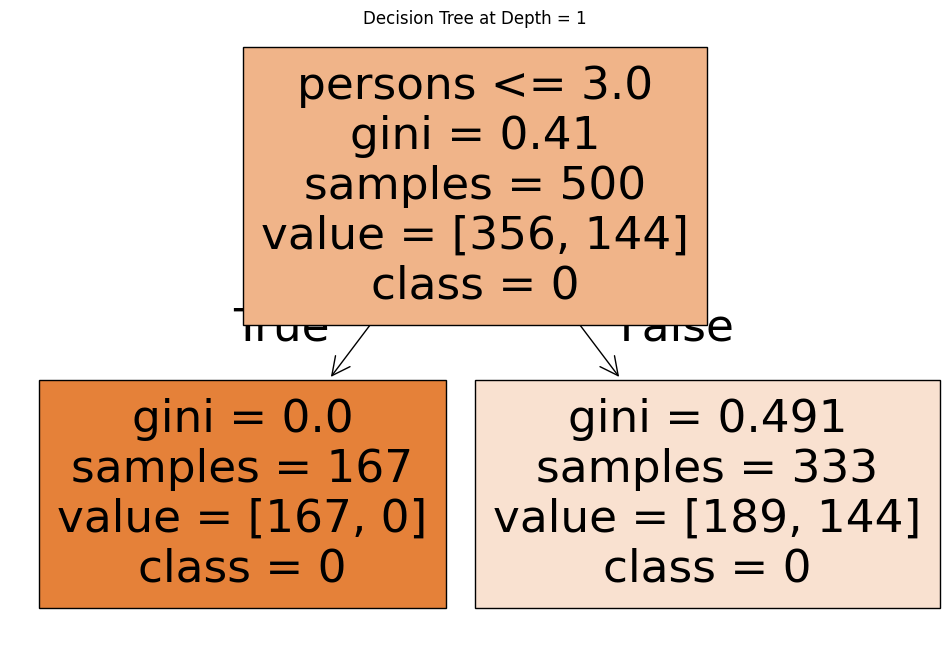


Building Tree with Depth = 2


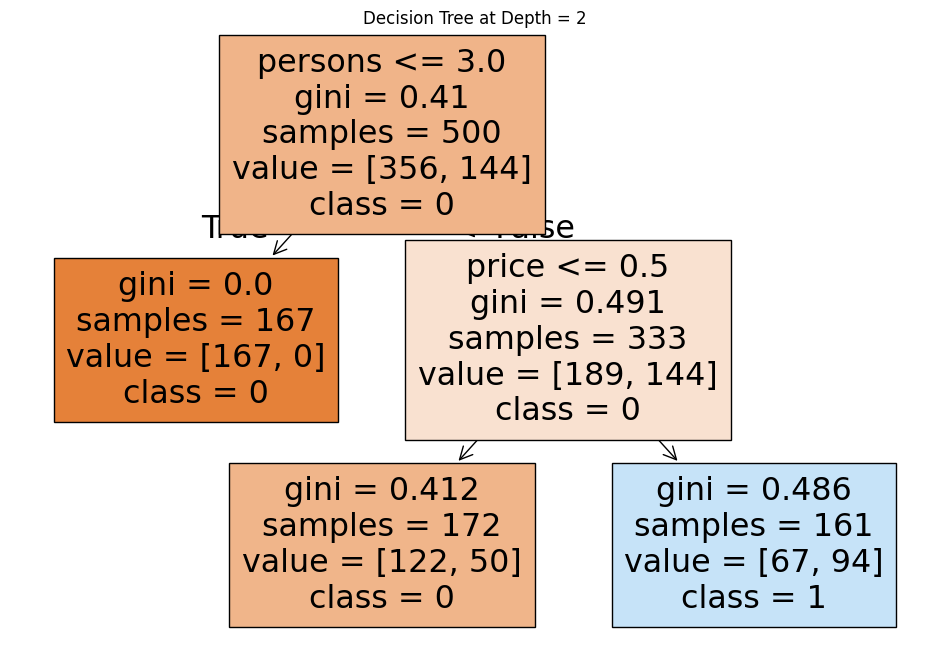


Building Tree with Depth = 3


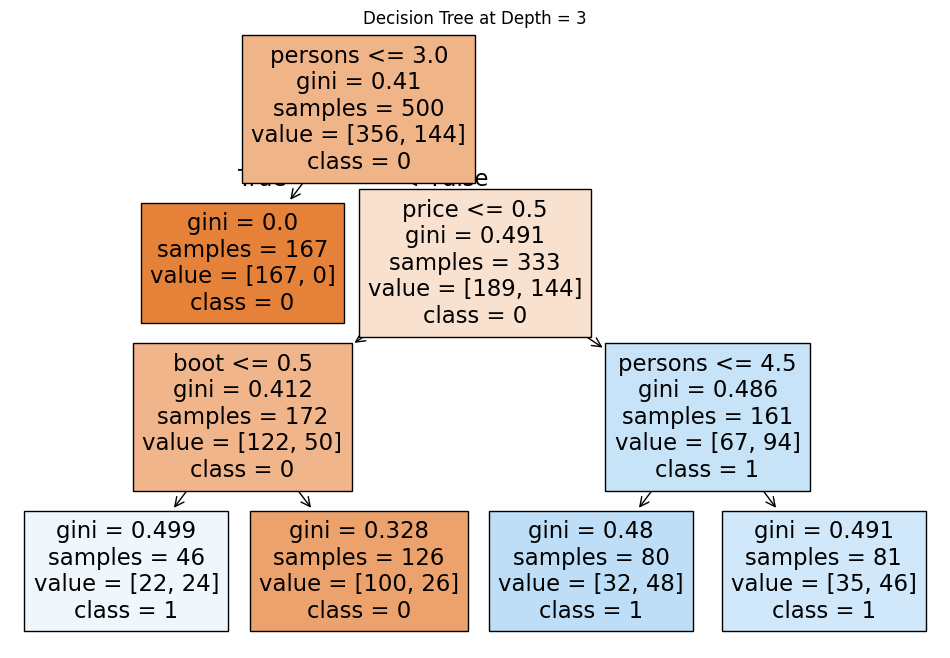


Building Tree with Depth = 4


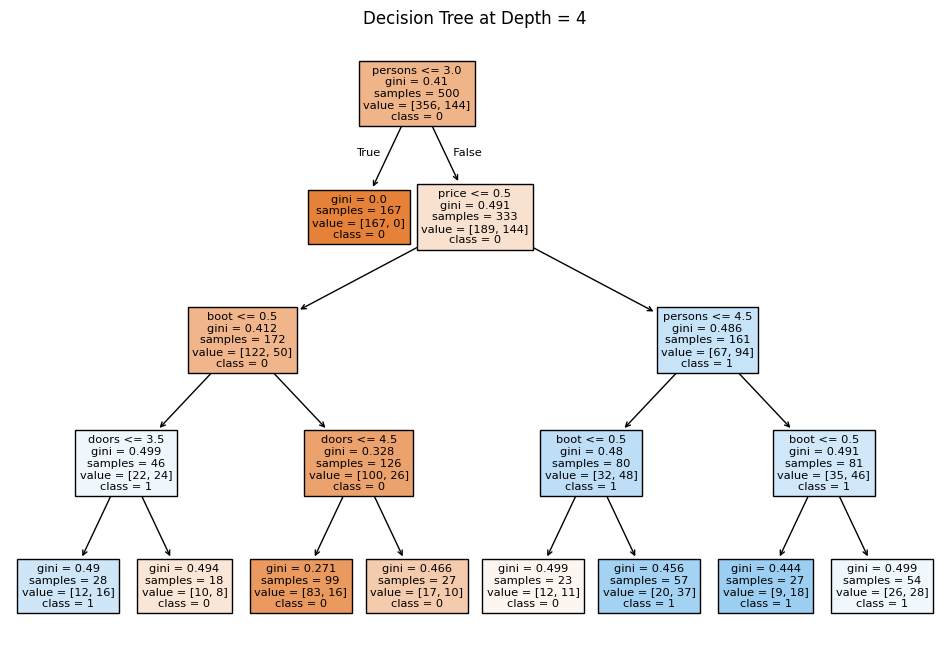


Building Tree with Depth = 5


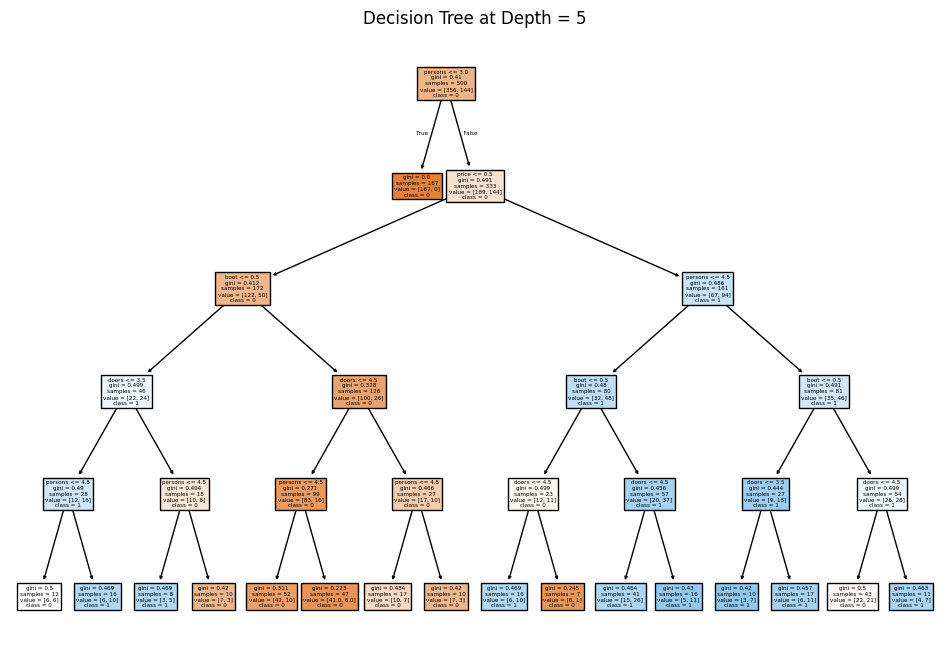


Building Tree with Depth = 6


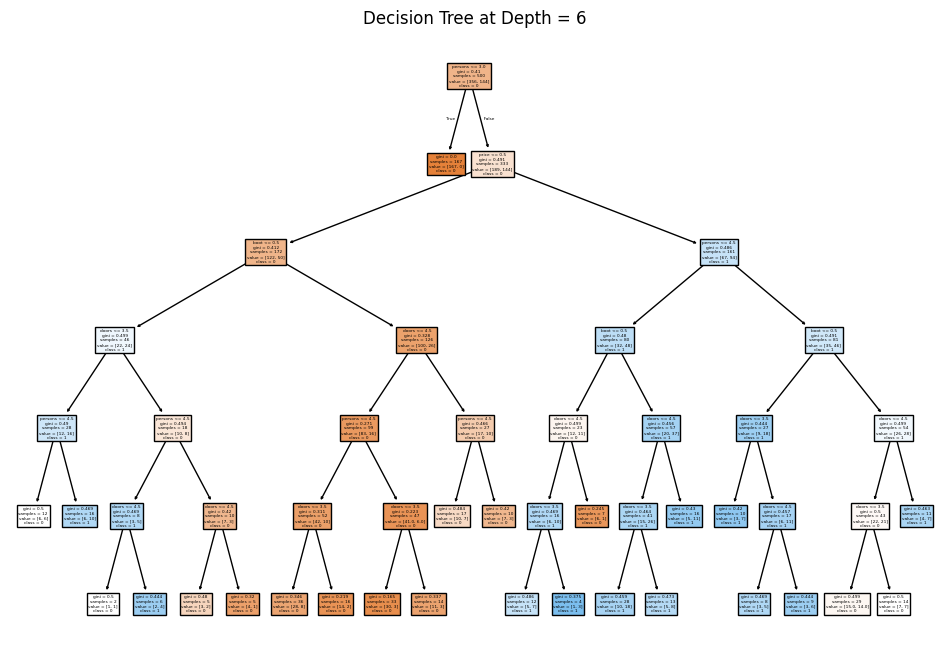

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree

def build_and_visualize_tree(X, y, max_depth):
    """

    Args:
      X:
      y:
      max_depth:

    Returns:

    """
    print(f"\nBuilding Tree with Depth = {max_depth}")

    # Train the decision tree
    clf = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
    clf.fit(X, y)


    # Visualize the tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True) # Now plot_tree is defined
    plt.title(f"Decision Tree at Depth = {max_depth}")
    plt.show()
    return clf

# Simulate building the tree incrementally
for depth in range(1, 7):  # Adjust depth range as needed
    build_and_visualize_tree(X, y, max_depth=depth)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the decision tree classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='best')  # 'best' ensures multiway splits

# Fit the model
Dtc.fit(X, y)


DecisionTreeClassifier()

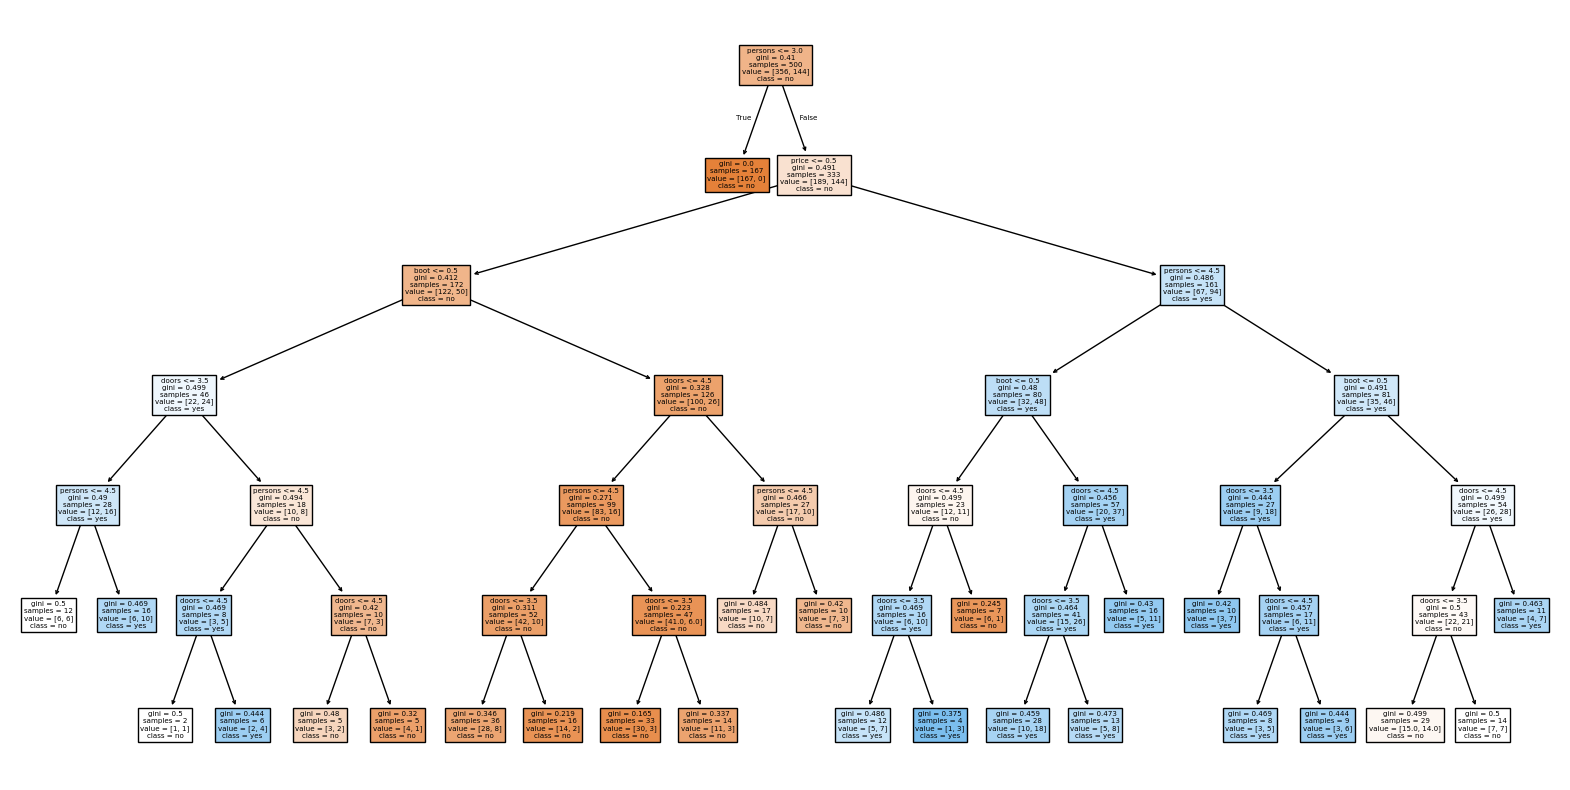

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(Dtc, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

In [ ]:
# Check tree structure before pruning
print("Tree Depth (Before Pruning):", Dtc.get_depth())
print("Number of Leaves (Before Pruning):", Dtc.get_n_leaves())


Tree Depth (Before Pruning): 6
Number of Leaves (Before Pruning): 25


In [ ]:
from sklearn.tree._tree import TREE_LEAF
import numpy as np

def prune_tree(tree, node_id=0, min_samples_leaf=1):
    """
    Post-prune a decision tree by replacing subtrees where all leaf nodes predict the same class
    with a single leaf node.

    Args:
        tree: The sklearn decision tree to be pruned (tree_ object from DecisionTreeClassifier).
        node_id: The current node ID being processed.
        min_samples_leaf: Minimum number of samples required to be at a leaf node.

    Returns:
        The predicted class of the pruned node or None if pruning was not performed.
    """

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    # Early termination if both children are leaves and predict the same class
    if left_child == TREE_LEAF and right_child == TREE_LEAF:
        if tree.value[node_id].sum() >= min_samples_leaf:
            return np.argmax(tree.value[node_id])
        else:
            return None

    # Recursively prune left and right subtrees
    left_class = prune_tree(tree, left_child, min_samples_leaf)
    right_class = prune_tree(tree, right_child, min_samples_leaf)

    # Prune the current node if both children are leaves and predict the same class
    if left_class is not None and right_class is not None and left_class == right_class:
        tree.children_left[node_id] = TREE_LEAF
        tree.children_right[node_id] = TREE_LEAF
        tree.value[node_id] = tree.value[left_child] + tree.value[right_child]
        return left_class

    return None

# Apply the pruning function to the trained decision tree
prune_tree(Dtc.tree_)




In [ ]:
print("Tree Depth (After Pruning):", Dtc.get_depth())
print("Number of Leaves (After Pruning):", Dtc.get_n_leaves())


Tree Depth (After Pruning): 6
Number of Leaves (After Pruning): 37


In [ ]:
import pandas as pd

# Load the test dataset
test_data = pd.read_csv('/content/ (1).csv')  # Replace with your test dataset path
X_test = test_data.drop('accept', axis=1)  # Replace 'target_column' with the actual target column name
y_test = test_data['accept']


FileNotFoundError: [Errno 2] No such file or directory: '/content/ (1).csv'

In [ ]:
# Use the pruned decision tree to predict on the test dataset
y_pred = pruned_tree.predict(X_test)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the test dataset
test_data = pd.read_csv('/content/myCarTestDataset_2024.csv')  # Replace with your test dataset path
X_test = test_data.drop('accept', axis=1)  # Replace 'target_column' with the actual target column name
y_test = test_data['accept']

# Identify categorical features in X_test
categorical_features = X_test.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical feature and transform the data
for feature in categorical_features:
    le = LabelEncoder()
    X_test[feature] = le.fit_transform(X_test[feature])

# Now use the pruned decision tree to predict on the preprocessed test dataset
y_pred = pruned_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Generate a classification report for more detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# Function to calculate Gini impurity for a group
def gini_impurity_group(class_counts, total_samples):
    return 1.0 - sum((count / total_samples) ** 2 for count in class_counts.values())

# Function to calculate weighted Gini impurity
def gini_impurity(groups, total_size):
    gini = 0.0
    for group_size, group_class_counts in groups:
        gini_group = gini_impurity_group(group_class_counts, group_size)
        gini += (group_size / total_size) * gini_group
    return gini

# Function to calculate and display detailed Gini impurity for a feature
def gini_for_feature(dataset, feature, target_column):
    print(f"\nFeature: {feature}")
    feature_splits = dataset.groupby(feature)[target_column].value_counts().unstack(fill_value=0)
    total_size = len(dataset)
    groups = []
    weighted_gini_calculation = []

    # Display detailed calculations for each split
    for value in feature_splits.index:
        yes_count = feature_splits.loc[value, 'yes'] if 'yes' in feature_splits.columns else 0
        no_count = feature_splits.loc[value, 'no'] if 'no' in feature_splits.columns else 0
        group_size = yes_count + no_count
        groups.append((group_size, {'yes': yes_count, 'no': no_count}))
        gini_group = gini_impurity_group({'yes': yes_count, 'no': no_count}, group_size)
        weighted_gini_calculation.append(f"({group_size}/{total_size})*{gini_group:.4f}")
        print(f"Gini({value}) = 1 - ({yes_count}/{group_size})^2 - ({no_count}/{group_size})^2 = {gini_group:.4f}")

    # Calculate and display weighted Gini impurity
    weighted_gini = gini_impurity(groups, total_size)
    calculation_string = " + ".join(weighted_gini_calculation)
    print(f"Weighted Gini for {feature} = {calculation_string} = {weighted_gini:.4f}")
    return weighted_gini

# Function to calculate Gini impurity of a node
def gini_node(dataset, target_column, depth):
    class_counts = dataset[target_column].value_counts().to_dict()
    total_size = len(dataset)

    # Get the unique class labels
    class_labels = list(class_counts.keys())

    # Check if class_labels has at least 2 elements before calculating Gini
    if len(class_labels) >= 2:
        gini = gini_impurity_group(class_counts, total_size)
        print(f"\nNode at depth {depth}:")
        print(f"Gini(Node) = 1 - ({class_counts[class_labels[0]]}/{total_size})^2 - ({class_counts[class_labels[1]]}/{total_size})^2 = {gini:.4f}")  # Use class_labels[0] and class_labels[1] for calculation
        print(f"Class Distribution: {class_counts}")
        return gini
    else:
        # Handle the case where there's only one class or no classes
        print(f"\nNode at depth {depth}: Only one class or no classes present.")
        print(f"Class Distribution: {class_counts}")
        return 0  # or another appropriate value for this case

# Recursive function to process each node
def process_node(dataset, target_column, features, depth=0, max_depth=3):
    # Calculate Gini for the current node
    gini_node(dataset, target_column, depth)

    if depth >= max_depth or len(dataset[target_column].unique()) == 1 or len(features) == 0:
        print("Stopping further splits (leaf node or max depth reached).\n")
        return

    # Evaluate features for splits
    print("\nEvaluating features for Gini impurity:")
    feature_ginis = {}
    for feature in features:
        feature_ginis[feature] = gini_for_feature(dataset, feature, target_column)

    # Select the best feature
    best_feature = min(feature_ginis, key=feature_ginis.get)
    print(f"\nBest feature for split: {best_feature} (Gini = {feature_ginis[best_feature]:.4f})")

    # Split dataset on the best feature
    splits = dataset.groupby(best_feature)
    remaining_features = [f for f in features if f != best_feature]

    # Process each split recursively
    for value, subset in splits:
        print(f"\nProcessing split: {best_feature} = {value} (Depth {depth + 1})")
        process_node(subset, target_column, remaining_features, depth + 1, max_depth)

# Main execution
target_column = 'accept'
features = ['price', 'doors', 'persons', 'boot']
max_depth = 3  # Set the maximum depth to visualize or process

print("Calculating Gini impurity of the decision tree:")
process_node(df, target_column, features, depth=0, max_depth=max_depth)